### Code to recreate figure 2E

In [1]:
# Import Libraries
from caveclient import CAVEclient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

client = CAVEclient()
datastack_name = 'fanc_production_mar2021'
client = CAVEclient(datastack_name)

In [3]:
# Specify the root_ids of the FeCO sensory neurons
FeCO_df= client.materialize.query_table('feco_axons_v0')
FeCO_df = FeCO_df[FeCO_df['classification_system'].str.contains('T1L')]

FeCO_df = FeCO_df.replace(to_replace='maybeclub', value='club')
FeCO_df = FeCO_df.replace(to_replace='club_asc', value='club')

allFeCO_ids = FeCO_df['pt_root_id'].tolist()
allFeCO_types = FeCO_df['cell_type'].tolist()
FeCO_dict = dict(zip(allFeCO_ids,allFeCO_types))

C:\Users\swetarr\anaconda3\envs\connectomics\lib\site-packages\pandas\core\missing.py:95: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_mask = arr == x


In [4]:
# Specify the root_ids of the hairplate sensory neurons

HP_df = client.materialize.query_table('hair_plate_table')
HP_df = HP_df[~HP_df['cell_type'].str.contains('CS')]

allHP_ids = HP_df['pt_root_id'].tolist()
allHP_types = HP_df['cell_type'].tolist()
HP_dict = dict(zip(allHP_ids,allHP_types))

In [5]:
# Specify the root_ids of the bristle sensory neurons

bristle_df = client.materialize.query_table('bristle_axon_table_v2')

allbristle_ids = bristle_df['pt_root_id'].tolist()
allbristle_types = bristle_df['cell_type'].tolist()
bristle_dict = dict(zip(allbristle_ids,allbristle_types))

In [6]:
# Specify the root_ids of the campaniform sensilla sensory neurons

CS_df = client.materialize.query_table('legcs_axons')

allCS_ids = CS_df['pt_root_id'].tolist()
allCS_types = CS_df['cell_type'].tolist()
CS_dict = dict(zip(allCS_ids,allCS_types))

### find all the downstream partners for each sensory cell type

In [7]:
#downstream partners of FeCO
syn_threshold = 3; 

FeCO_outputs = client.materialize.synapse_query(pre_ids = allFeCO_ids)
syn_per_FeCO_output = FeCO_outputs.groupby(['pre_pt_root_id','post_pt_root_id'])['post_pt_root_id'].count().reset_index(name="number_of_synapses").sort_values(by=['number_of_synapses'], ascending=False).reset_index(drop=True)
syn_per_FeCO_output = syn_per_FeCO_output[[ "pre_pt_root_id", "post_pt_root_id", "number_of_synapses"]][syn_per_FeCO_output['number_of_synapses'] > syn_threshold]

all_FeCOpartners = syn_per_FeCO_output.drop_duplicates(subset = "post_pt_root_id")['post_pt_root_id'].to_list()

In [8]:
#downstream partners of HPs
syn_threshold = 3; 

HP_outputs = client.materialize.synapse_query(pre_ids = allHP_ids)
syn_per_HP_output = HP_outputs.groupby(['pre_pt_root_id','post_pt_root_id'])['post_pt_root_id'].count().reset_index(name="number_of_synapses").sort_values(by=['number_of_synapses'], ascending=False).reset_index(drop=True)
syn_per_HP_output = syn_per_HP_output[[ "pre_pt_root_id", "post_pt_root_id", "number_of_synapses"]][syn_per_HP_output['number_of_synapses'] > syn_threshold]

all_HPpartners = syn_per_HP_output.drop_duplicates(subset = "post_pt_root_id")['post_pt_root_id'].to_list()

In [9]:
#downstream partners of CS
syn_threshold = 3; 

CS_outputs = client.materialize.synapse_query(pre_ids = allCS_ids)
syn_per_CS_output = CS_outputs.groupby(['pre_pt_root_id','post_pt_root_id'])['post_pt_root_id'].count().reset_index(name="number_of_synapses").sort_values(by=['number_of_synapses'], ascending=False).reset_index(drop=True)
syn_per_CS_output = syn_per_CS_output[[ "pre_pt_root_id", "post_pt_root_id", "number_of_synapses"]][syn_per_CS_output['number_of_synapses'] > syn_threshold]

all_CSpartners = syn_per_CS_output.drop_duplicates(subset = "post_pt_root_id")['post_pt_root_id'].to_list()

In [10]:
#downstream partners of bristles
syn_threshold = 3; 

bristle_outputs = client.materialize.synapse_query(pre_ids = allbristle_ids)
syn_per_bristle_output = bristle_outputs.groupby(['pre_pt_root_id','post_pt_root_id'])['post_pt_root_id'].count().reset_index(name="number_of_synapses").sort_values(by=['number_of_synapses'], ascending=False).reset_index(drop=True)
syn_per_bristle_output = syn_per_bristle_output[[ "pre_pt_root_id", "post_pt_root_id", "number_of_synapses"]][syn_per_bristle_output['number_of_synapses'] > syn_threshold]

all_bristlepartners = syn_per_bristle_output.drop_duplicates(subset = "post_pt_root_id")['post_pt_root_id'].to_list()

In [11]:
#downstream partners of neck ChO (neck ChO segids mannually specified, need to be manually updated with latest segids when running code)
neckids = [648518346490203419,648518346502126409,648518346497202584,648518346502511955,648518346488151632,
           648518346492462975,648518346488665993,648518346490488072,648518346467432967,648518346503904673,
           648518346500163071,648518346494725765,648518346489700972,648518346497042660,648518346498668272,
           648518346489700460,648518346497043172,648518346486523040,648518346487719594,648518346472670729,
           648518346512882078,648518346490567516,648518346486916860,648518346470626046]

syn_threshold = 3; 

neck_outputs = client.materialize.synapse_query(pre_ids = neckids)
all_neckpartners = neck_outputs.drop_duplicates(subset = "post_pt_root_id")['post_pt_root_id'].to_list()

In [12]:
#downstream partners of wing ChO
wingids = client.materialize.query_table('sensory_admn_left')['pt_root_id'].tolist()

syn_threshold = 3; 

wing_outputs = client.materialize.synapse_query(pre_ids = wingids)
all_wingpartners = wing_outputs.drop_duplicates(subset = "post_pt_root_id")['post_pt_root_id'].to_list()

### find which partners overlap between each sensory type, and total number of input synapses

In [13]:
#overlap between FeCO and HP
FeCO_HP_overlap = set(all_FeCOpartners).intersection(all_HPpartners)

#overlap between FeCO and bristles
FeCO_bristle_overlap = set(all_FeCOpartners).intersection(all_bristlepartners)

#overlap between FeCO and CS
FeCO_CS_overlap = set(all_FeCOpartners).intersection(all_CSpartners)

#overlap between HP and CS
HP_CS_overlap = set(all_HPpartners).intersection(all_CSpartners)

#overlap between CS and bristles
CS_bristle_overlap = set(all_CSpartners).intersection(all_bristlepartners)

In [14]:
FeCO_modules = list(set(allFeCO_types))
FeCO_modules = sorted(FeCO_modules)

In [15]:
#overlap with each of the FeCO sensory modules
# calculate percentage of the FeCO module's partners that are shared, to then plot as a bar graph

FeCO_modules = list(set(allFeCO_types))
FeCO_modules = sorted(FeCO_modules)

shared_connectivity_df = pd.DataFrame()

for j, sensory_module in enumerate(FeCO_modules):
    theseFeCOids = FeCO_df.query('cell_type==@sensory_module')['pt_root_id'].to_list()
    these_dsFeCOpartners = syn_per_FeCO_output.query('pre_pt_root_id in @theseFeCOids')['post_pt_root_id'].to_list()
    total_syns = syn_per_FeCO_output.query('pre_pt_root_id in @theseFeCOids')['number_of_synapses'].sum()
    
    otherFeCOtypes = list(set(allFeCO_types))
    otherFeCOtypes.remove(sensory_module)
    
    FeCOFeCO_overlap = [np.nan]*4
    for k, otherFeCOmodule in enumerate(otherFeCOtypes):
        otherFeCOids = FeCO_df.query('cell_type==@otherFeCOmodule')['pt_root_id'].to_list()
        other_dsFeCOpartners = syn_per_FeCO_output.query('pre_pt_root_id in @otherFeCOids')['post_pt_root_id'].to_list()
        overlapping_partners = set(these_dsFeCOpartners).intersection(other_dsFeCOpartners)
        
        #overlapping % of partners
        FeCOFeCO_overlap[k] = len(overlapping_partners)/len(these_dsFeCOpartners)
    
    FeCOmodule_HP_overlap = set(these_dsFeCOpartners).intersection(all_HPpartners)
    FeCOmodule_bristle_overlap = set(these_dsFeCOpartners).intersection(all_bristlepartners)
    FeCOmodule_CS_overlap = set(these_dsFeCOpartners).intersection(all_CSpartners)
    FeCOmodule_wing_overlap = set(these_dsFeCOpartners).intersection(all_wingpartners)
    FeCOmodule_neck_overlap = set(these_dsFeCOpartners).intersection(all_neckpartners)
    
    #percent partner overlap
    FeCOmodule_HP_overlap_pp = len(FeCOmodule_HP_overlap)/len(these_dsFeCOpartners)
    FeCOmodule_bristle_overlap_pp = len(FeCOmodule_bristle_overlap)/len(these_dsFeCOpartners)
    FeCOmodule_CS_overlap_pp = len(FeCOmodule_CS_overlap)/len(these_dsFeCOpartners)
    FeCOmodule_wing_overlap_pp = len(FeCOmodule_wing_overlap)/len(these_dsFeCOpartners)
    FeCOmodule_neck_overlap_pp = len(FeCOmodule_neck_overlap)/len(these_dsFeCOpartners)
    
    #percent synapses overlap
    FeCOmodule_HP_overlap_syn = syn_per_FeCO_output.query('pre_pt_root_id in @theseFeCOids and post_pt_root_id in @FeCOmodule_HP_overlap')['number_of_synapses'].sum()/total_syns
    FeCOmodule_bristle_overlap_syn = syn_per_FeCO_output.query('pre_pt_root_id in @theseFeCOids and post_pt_root_id in @FeCOmodule_bristle_overlap')['number_of_synapses'].sum()/total_syns
    FeCOmodule_CS_overlap_syn = syn_per_FeCO_output.query('pre_pt_root_id in @theseFeCOids and post_pt_root_id in @FeCOmodule_CS_overlap')['number_of_synapses'].sum()/total_syns
    FeCOmodule_wing_overlap_syn = syn_per_FeCO_output.query('pre_pt_root_id in @theseFeCOids and post_pt_root_id in @FeCOmodule_wing_overlap')['number_of_synapses'].sum()/total_syns
    FeCOmodule_neck_overlap_syn = syn_per_FeCO_output.query('pre_pt_root_id in @theseFeCOids and post_pt_root_id in @FeCOmodule_neck_overlap')['number_of_synapses'].sum()/total_syns
    
    shared_connectivity_df = pd.concat([shared_connectivity_df, pd.DataFrame({'FeCO_module': sensory_module, 
                                                                              'PartnerType': ['HP', 'bristles', 'CS', 'wing SNs', 'neck ChO']+otherFeCOtypes, 
                                                                              'Overlap': [FeCOmodule_HP_overlap_pp,  FeCOmodule_bristle_overlap_pp, 
                                                                                          FeCOmodule_CS_overlap_pp, FeCOmodule_wing_overlap_pp, 
                                                                                          FeCOmodule_neck_overlap_pp]+FeCOFeCO_overlap}), 
                                        pd.DataFrame({'FeCO_module': FeCO_modules, 'PartnerType': FeCO_modules, 'Overlap': [1, 1, 1, 1, 1]})])

shared_connectivity_df = shared_connectivity_df.drop_duplicates(['FeCO_module','PartnerType'])

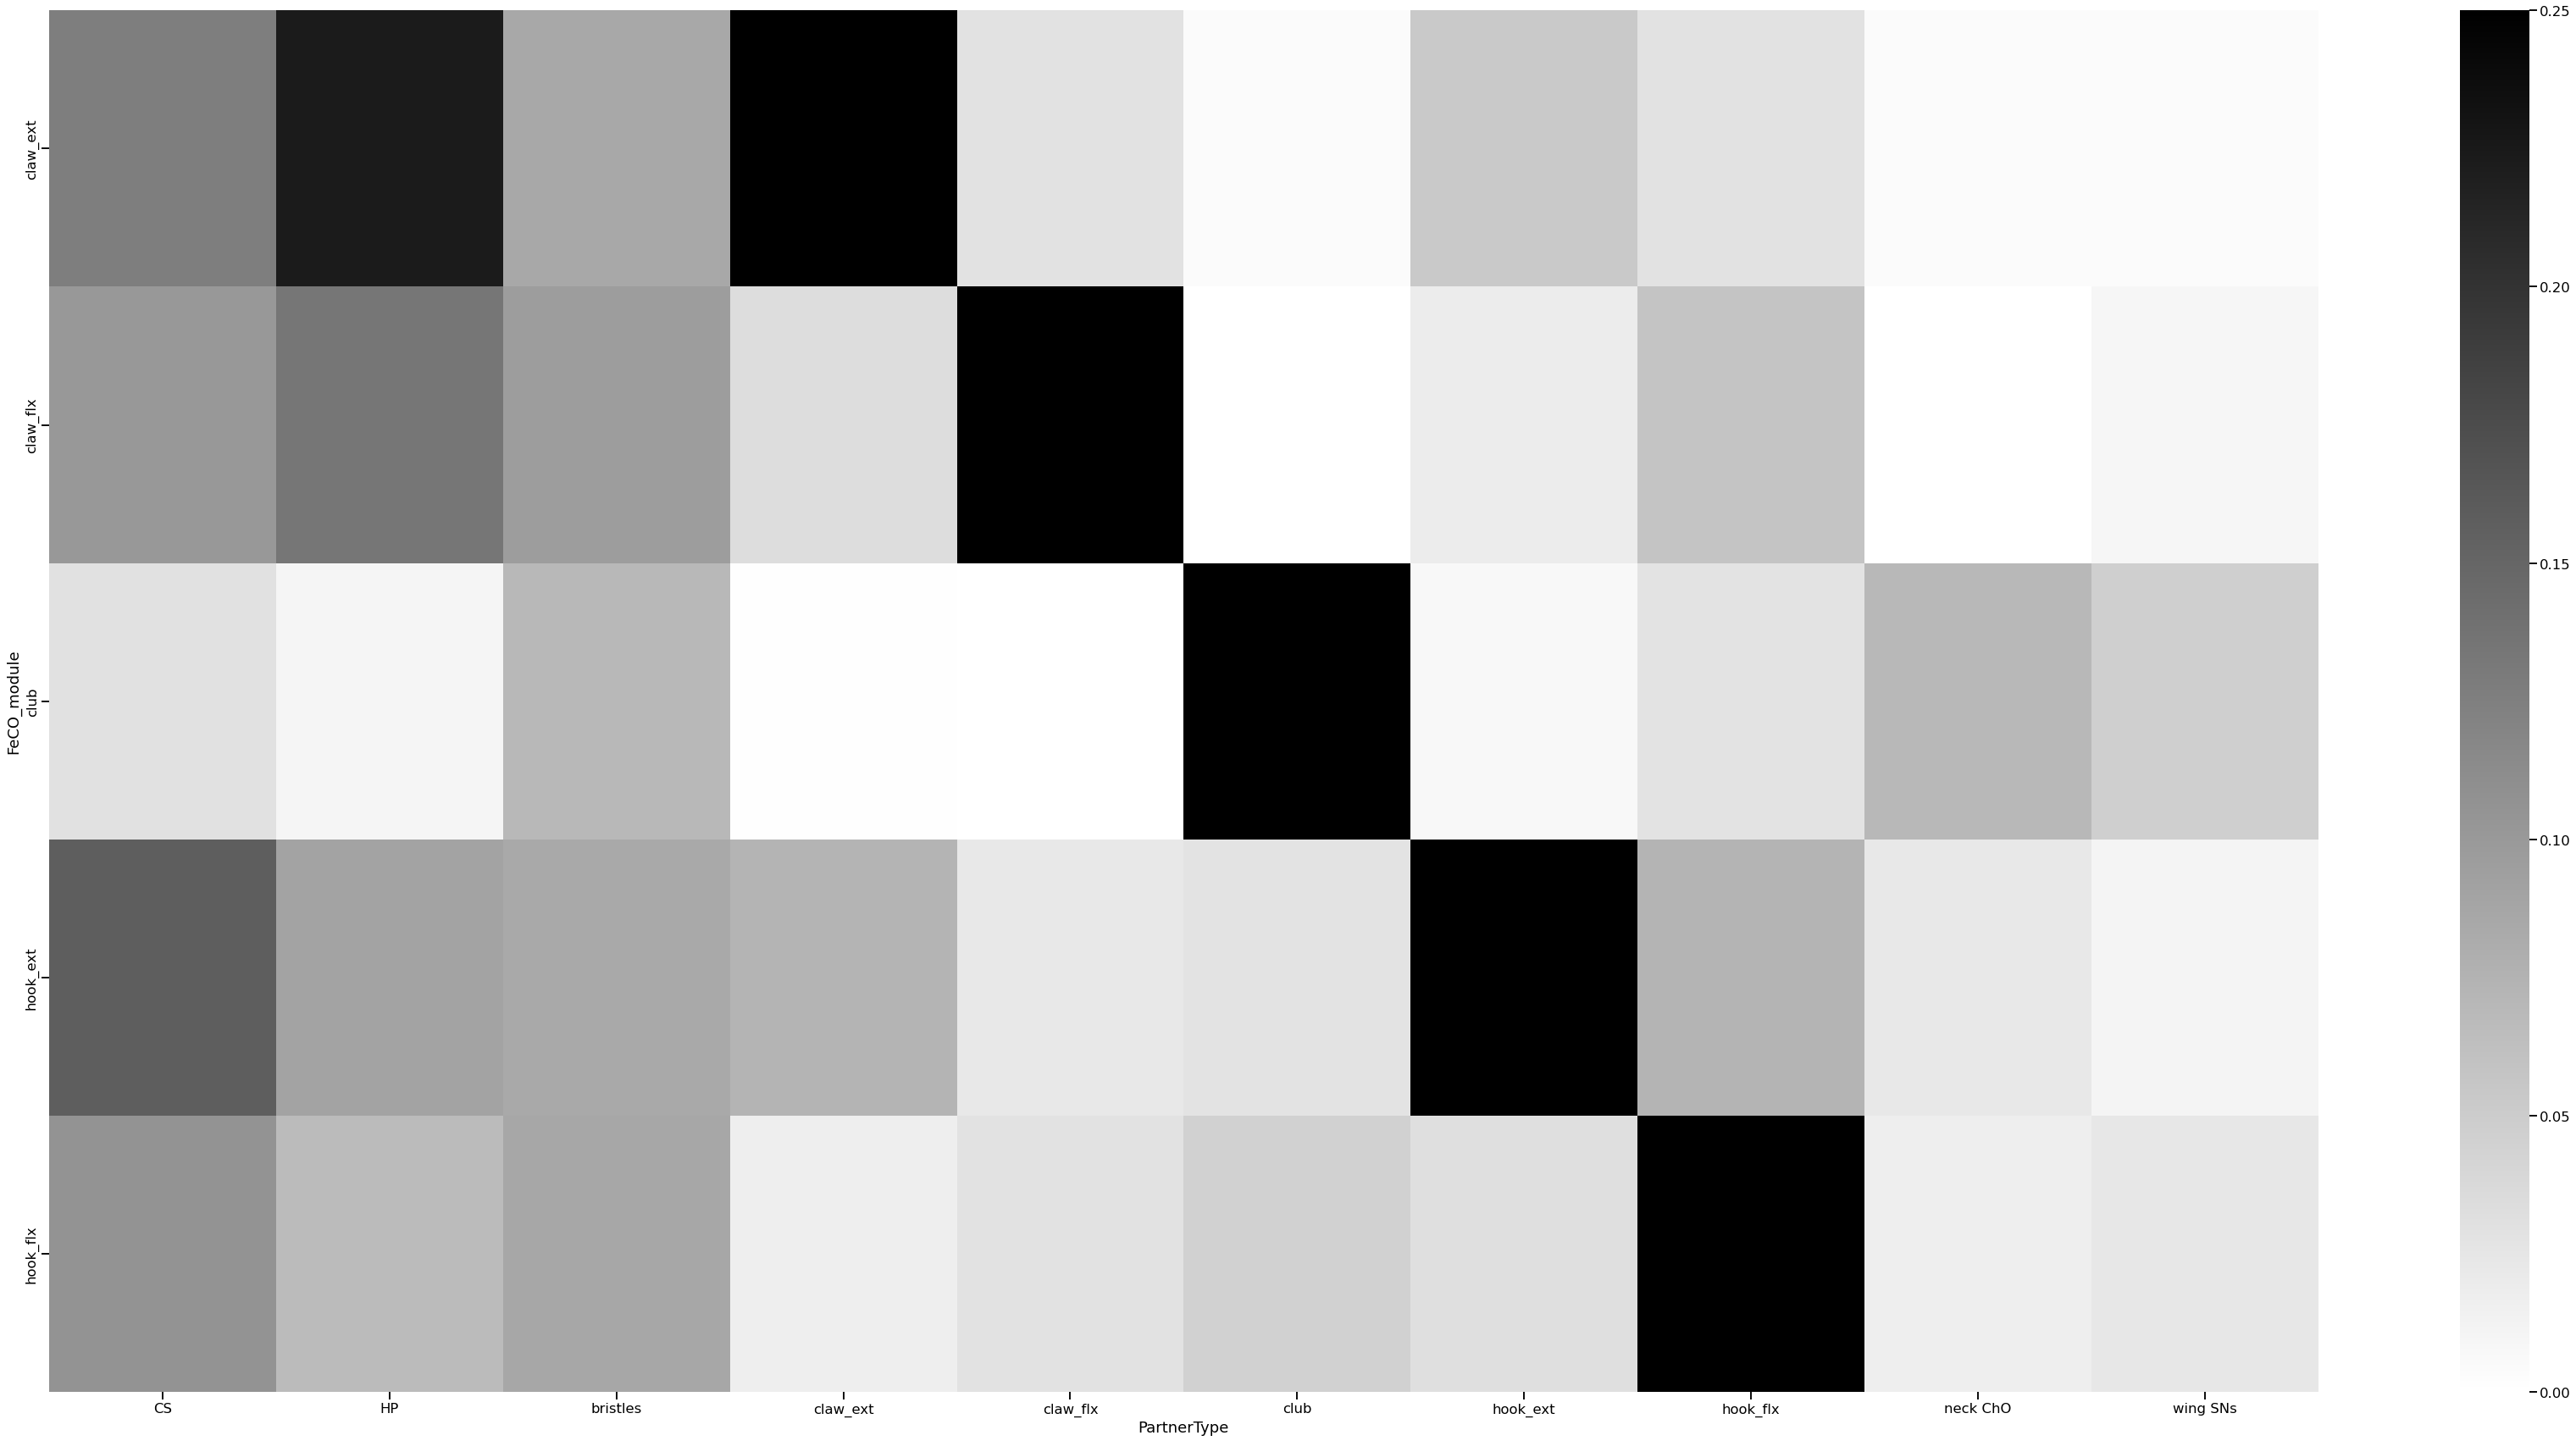

In [16]:
#plot! a heatmap!
gray_map = sns.color_palette("blend:white,black", as_cmap=True)
figure_size = [60, 30]
fig = plt.figure(1, figsize = figure_size)
sns.set_context("talk")
ytick_fontsize = 10
xtick_fontsize = 20

shared_connectivity_df_pivoted = shared_connectivity_df.pivot(index="FeCO_module", columns="PartnerType", values="Overlap")
g = sns.heatmap(shared_connectivity_df_pivoted, cmap=gray_map, vmax=0.25)